# Named Entity Recognition Using Spacy

**In this notebook, I'm using Spacy library to tag the named enities with a focus on locations and addresses.
Working with Spacy is pretty easy and give us a very quick results to tackle this problem with a reasonable accuracy. Actually this part took less than one hour. All the remaining time was to tackle the problem using recurrent neural network models (Bi-directional LSTM with pretrained embedding layer).**

I tried to work in a different direction by building a deep sequence model using bi-directional LSTM and I found a very good paper that worked on a similar problem. This paper introduced an approach to achieve a very good results in named entity recognition problems.  This model achieved F1 score of 91.62 on CoNLL-2003 and 86.28 on OntoNotes. You can find this paper here https://arxiv.org/abs/1511.08308

I used this BI-LSTM model and I tried to fine-tune its hyperparameters and train the model for only 10 epochs (I don't have GPUs on my machine), I got results about 83% for F1 score on the training set and abut 82% on the test set. This direction really needs more time to get better results by apply cross validation on the hyperparameters to pick the best values and retrain the model. It's worthy to metion that that model has a pre-trained embedding layer (Glove) with embedding vectors of deminsion (50,) per each word and this layer in the proposed model is set as non-trainable layer. I will share these LSTM trials later in another notebook to make things better organized.  

In [78]:
# Load all the required python libraries and modules
import spacy
from spacy import displacy
import numpy as np
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [79]:
doc_sample1 = nlp('Obama was born on August 4, 1961, at Kapiolani Medical Center for Women and Children in Honolulu, Hawaii.\
He is the only President who was born in Hawaii and the only President who was born outside of the contiguous 48 states.\
He was born to a white mother and a black father. His mother, Ann Dunham (1942–1995), was born in Wichita, Kansas; \
she was mostly of English descent, with some German, Irish, Scottish, Swiss, and Welsh ancestry.\
His father, Barack Obama Sr. (1936–1982), was a married Luo Kenyan man from Nyang''oma Kogelo. Obama''s \
parents met in 1960 in a Russian language class at the University of Hawaii at Manoa, where his father was \
a foreign student on a scholarship. The couple married in Wailuku, Hawaii on February 2, 1961, \
six months before Obama was born.')

pp.pprint([(X.text, X.label_) for X in doc_sample1.ents])

[   ('August 4, 1961', 'DATE'),
    ('Kapiolani Medical Center for Women and Children', 'ORG'),
    ('Honolulu', 'GPE'),
    ('Hawaii', 'GPE'),
    ('Hawaii', 'GPE'),
    ('48', 'CARDINAL'),
    ('Ann Dunham', 'PERSON'),
    ('1942–1995', 'DATE'),
    ('Wichita', 'GPE'),
    ('Kansas', 'GPE'),
    ('English', 'NORP'),
    ('German', 'NORP'),
    ('Irish', 'NORP'),
    ('Scottish', 'NORP'),
    ('Swiss', 'NORP'),
    ('Welsh', 'GPE'),
    ('Barack Obama Sr', 'PERSON'),
    ('1936–1982', 'DATE'),
    ('Luo Kenyan', 'PERSON'),
    ('Nyangoma', 'GPE'),
    ('Kogelo', 'PERSON'),
    ('1960', 'DATE'),
    ('Russian', 'LANGUAGE'),
    ('the University of Hawaii', 'ORG'),
    ('Manoa', 'ORG'),
    ('Wailuku', 'GPE'),
    ('Hawaii', 'GPE'),
    ('February 2, 1961,', 'DATE'),
    ('six months', 'DATE'),
    ('Obama', 'PERSON')]


In [80]:
displacy.render(doc_sample1, jupyter=True, style='ent', options={'ents':['GPE', 'LOC', 'FAC']})

In [81]:
doc_sample2 = nlp('I live in Union Square 23, San Francisco.')
pp.pprint([(X.text, X.label_) for X in doc_sample2.ents])

[('Union Square 23', 'FAC'), ('San Francisco', 'GPE')]


In [82]:
doc_sample3 = nlp('Mr. Charles B. Evans is a consular officer, Department of State, Nouakchott Place 33, Washington DC')
pp.pprint([(X.text, X.label_) for X in doc_sample3.ents])

[   ('Charles B. Evans', 'PERSON'),
    ('Department of State', 'ORG'),
    ('Nouakchott Place 33', 'ORG'),
    ('Washington DC', 'GPE')]


In [83]:
doc_sample4 = nlp('Friend of mine has moved recently from Håndværkervej 23, Esbjerg to Nybrogade 2, 1203 Copenhagen K')
pp.pprint([(X.text, X.label_) for X in doc_sample4.ents])

[   ('Håndværkervej', 'GPE'),
    ('23', 'CARDINAL'),
    ('Esbjerg', 'ORG'),
    ('Nybrogade 2,', 'ORG'),
    ('1203', 'DATE'),
    ('Copenhagen K', 'FAC')]


In [84]:
pp.pprint([(X, X.ent_iob_, X.ent_type_) for X in doc_sample1])

[   (Obama, 'O', ''),
    (was, 'O', ''),
    (born, 'O', ''),
    (on, 'O', ''),
    (August, 'B', 'DATE'),
    (4, 'I', 'DATE'),
    (,, 'I', 'DATE'),
    (1961, 'I', 'DATE'),
    (,, 'O', ''),
    (at, 'O', ''),
    (Kapiolani, 'B', 'ORG'),
    (Medical, 'I', 'ORG'),
    (Center, 'I', 'ORG'),
    (for, 'I', 'ORG'),
    (Women, 'I', 'ORG'),
    (and, 'I', 'ORG'),
    (Children, 'I', 'ORG'),
    (in, 'O', ''),
    (Honolulu, 'B', 'GPE'),
    (,, 'O', ''),
    (Hawaii, 'B', 'GPE'),
    (., 'O', ''),
    (He, 'O', ''),
    (is, 'O', ''),
    (the, 'O', ''),
    (only, 'O', ''),
    (President, 'O', ''),
    (who, 'O', ''),
    (was, 'O', ''),
    (born, 'O', ''),
    (in, 'O', ''),
    (Hawaii, 'B', 'GPE'),
    (and, 'O', ''),
    (the, 'O', ''),
    (only, 'O', ''),
    (President, 'O', ''),
    (who, 'O', ''),
    (was, 'O', ''),
    (born, 'O', ''),
    (outside, 'O', ''),
    (of, 'O', ''),
    (the, 'O', ''),
    (contiguous, 'O', ''),
    (48, 'B', 'CARDINAL'),
    (states, 'O', '

In [85]:
# Install BeautifulSoup library to scarp  sample text documents from other Websites such as Wikipedia in our scenario
!pip install BeautifulSoup4

In [86]:
# Import libraries required for the scrapping helper function
from bs4 import BeautifulSoup
import requests
import re

"""This is a helper function to scrap a text from a URL"""
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

# Now let's scrap some text from Wikipedia to tag the named entities in that text corpus
obama_bio = url_to_string('https://en.wikipedia.org/wiki/Barack_Obama')
article = nlp(obama_bio)

# Show the total number of the recognized entities in the text scrapped from Obama's Wikipedia document URL
len(article.ents)

8763

In [87]:
# Show the frequency of the different named entities in the whole Wikipedia document
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 397,
         'DATE': 2349,
         'EVENT': 48,
         'FAC': 63,
         'GPE': 1001,
         'LANGUAGE': 6,
         'LAW': 28,
         'LOC': 56,
         'MONEY': 35,
         'NORP': 252,
         'ORDINAL': 109,
         'ORG': 1648,
         'PERCENT': 43,
         'PERSON': 2452,
         'PRODUCT': 66,
         'QUANTITY': 4,
         'TIME': 14,
         'WORK_OF_ART': 192})

[   ('Obama', 524),
    ('U.S.', 76),
    ('Barack Obama', 72),
    ('The New York Times', 68),
    ('first', 52),
    ('2012', 48),
    ('Chicago', 43),
    ('CNN', 41),
    ('the United States', 37),
    ('The Washington Post', 37)]


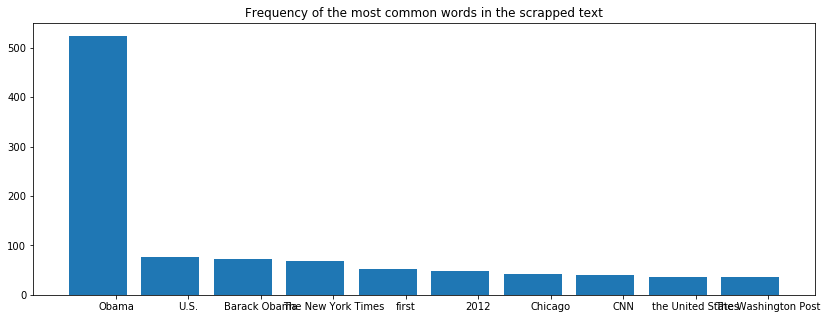

In [88]:
items = [x.text for x in article.ents if x.text != '\xa0']

# Show the most 10 common / frequent words in the whole scrappe document
most_common_10 = Counter(items).most_common(10)
pp.pprint(most_common_10)

labels, values = zip(*most_common_10)

indexes = np.arange(len(labels))
plt.figure(figsize=(14,5))
bar_width = 0.25

plt.bar(indexes, values)

# add labels and show the bar
plt.xticks(indexes + bar_width, labels)
plt.title('Frequency of the most common words in the scrapped text')
plt.show()

In [89]:
sentences = [x for x in article.sents]
chosen_sentence = sentences[30]

print(chosen_sentence)

Obama was born in 1961 in Honolulu, Hawaii, two years after the territory was admitted to the Union as the 50th state.


In [90]:
# Use displaxy module to highlight the tagging of the named entities on a sample chosen sentence from our Wikipedia document

displacy.render(nlp(str(chosen_sentence)), jupyter=True, style='ent')

In [91]:
""" We can also use displacy module to visualize the dependency between the different token in a given sentence 
as shown in the follwing scenario of our chosen sentence from the text corpus """

displacy.render(nlp(str(chosen_sentence)), style='dep', jupyter = True, options = {'distance': 100})

In [92]:
# Check the part of speech tags for each token / word in that sentence after excluding the stop words and the punctuations.

[(x.orth_,x.pos_, x.lemma_) for x in [y 
                      for y
                      in nlp(str(chosen_sentence)) 
                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('Obama', 'PROPN', 'obama'),
 ('born', 'VERB', 'bear'),
 ('1961', 'NUM', '1961'),
 ('Honolulu', 'PROPN', 'honolulu'),
 ('Hawaii', 'PROPN', 'hawaii'),
 ('years', 'NOUN', 'year'),
 ('territory', 'NOUN', 'territory'),
 ('admitted', 'VERB', 'admit'),
 ('Union', 'PROPN', 'union'),
 ('50th', 'ADJ', '50th'),
 ('state', 'NOUN', 'state')]

In [93]:
# Show the different named entities (GPE, ORG, DATE, LOC, FAC) in that sentence
entities_dict = dict([(str(x), x.label_) for x in nlp(str(chosen_sentence)).ents])
pp.pprint(entities_dict)

{   '1961': 'DATE',
    '50th': 'ORDINAL',
    'Hawaii': 'GPE',
    'Honolulu': 'GPE',
    'Union': 'ORG',
    'two years': 'DATE'}


In [94]:
pp.pprint([(x, x.ent_iob_, x.ent_type_) for x in chosen_sentence])

[   (Obama, 'B', 'PERSON'),
    (was, 'O', ''),
    (born, 'O', ''),
    (in, 'O', ''),
    (1961, 'B', 'DATE'),
    (in, 'O', ''),
    (Honolulu, 'B', 'GPE'),
    (,, 'O', ''),
    (Hawaii, 'B', 'GPE'),
    (,, 'O', ''),
    (two, 'B', 'DATE'),
    (years, 'I', 'DATE'),
    (after, 'O', ''),
    (the, 'O', ''),
    (territory, 'O', ''),
    (was, 'O', ''),
    (admitted, 'O', ''),
    (to, 'O', ''),
    (the, 'O', ''),
    (Union, 'B', 'ORG'),
    (as, 'O', ''),
    (the, 'O', ''),
    (50th, 'B', 'ORDINAL'),
    (state, 'O', ''),
    (., 'O', '')]


In [95]:
# tag only the following named entities "'GPE', 'LOC', 'FAC'" in the document which are usually to compose and format addresses

displacy.render(nlp(str(sentences)), jupyter=True, style='ent', options={'ents':['GPE', 'LOC', 'FAC']})


In [104]:
# Sample made-up sentence from a csv file I have downloaded from the given Website for the Denmark addresses 
# (https://dawa.aws.dk/dok/api/replikering-data)

doc_Denmark_Sample =nlp('I live currently in 4 Absalonsvej, Bjerge Str, Copenhagen City, Denmark')
displacy.render(doc_Denmark_Sample , jupyter=True, style='ent', options={'ents':['GPE', 'LOC', 'FAC']})